# **Trabajo Práctico 1 : Reservas de Hotel**
### *Continuación Checkpoint 1 - Notebook 2*
###Grupo 22: JARVIS
+ 107666	CELANO MINIG, NICOLÁS FRANCO
+ 108642	RANDO, JULIAN AGUSTIN
+ 106421	GOMEZ, ALEJO

Importamos las bibliotecas a utilizar para continuar con el trabajo e importamos el dataset modificado

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import mahalanobis
from google.colab import files
from sklearn.ensemble import IsolationForest

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

colors = sns.color_palette(n_colors=15)

hotels_test_url = 'https://raw.githubusercontent.com/agomezalejo/7506R-1C2023-GRUPO22/main/df_hotel_modificado.csv'
df_original = pd.read_csv(hotels_test_url)
df_hotel = df_original.copy()
df_hotel_mahalanobis = df_hotel.copy()

##Valores Atípicos

### **Relaciones multivariadas**

In [ ]:
def boxplot_mahalanobis_entre(variable_uno, variable_dos):
    global df_hotel_mahalanobis, df_hotel
    
    X = df_hotel[[variable_uno, variable_dos]]
    X_centered = X - np.mean(X, axis=0)
    cov = np.cov(X_centered, rowvar=False)
    inv_covmat = np.linalg.inv(cov)
    dist = []
    for i in range(X.shape[0]):
        dist.append(mahalanobis(X_centered.iloc[i], np.mean(X, axis=0), inv_covmat))

    nombre_mahala = 'mahala_dist_'+variable_uno+'_'+variable_dos
    print(nombre_mahala)
    df_hotel_mahalanobis[nombre_mahala] = dist

    sns.boxplot(y=df_hotel_mahalanobis[nombre_mahala])
    plt.title('Boxplot de la matriz de Mahalanobis para '+variable_uno+' y '+variable_dos)
    plt.show()

In [ ]:
def eliminar(df):
    global df_hotel, df_hotel_mahalanobis
    indices_a_eliminar = df.index
    df_hotel = df_hotel.drop(indices_a_eliminar)
    df_hotel = df_hotel.reset_index(drop=True)

    df_hotel_mahalanobis = df_hotel_mahalanobis.drop(indices_a_eliminar)
    df_hotel_mahalanobis = df_hotel_mahalanobis.reset_index(drop=True)
    return

#### **adults y children**

Veamos el diagrama de dispersión.

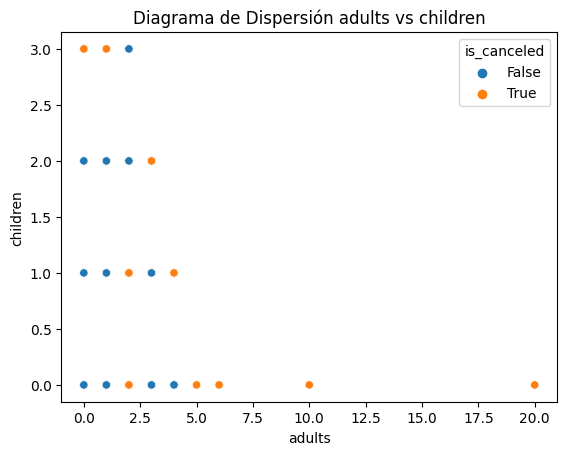

In [ ]:
sns.scatterplot(x=df_hotel['adults'], y=df_hotel['children'], hue=df_hotel['is_canceled'])
plt.title('Diagrama de Dispersión adults vs children')
plt.show()

Observamos que existen casos en donde aults y children son 0, lo que resulta imposible.

In [ ]:
df_sin_adultos = df_hotel[df_hotel['adults'] == 0]
df_sin_niños_adultos = df_sin_adultos[df_sin_adultos['children']==0]
print("Cantidad de casos en donde adults y children valen cero:",df_sin_niños_adultos.shape[0])

Cantidad de casos en donde adults y children valen cero: 71


Procedemos a eliminarlos.

In [ ]:
eliminar(df_sin_niños_adultos)

#### **total_of_special_requests y adr**

mahala_dist_total_of_special_requests_adr


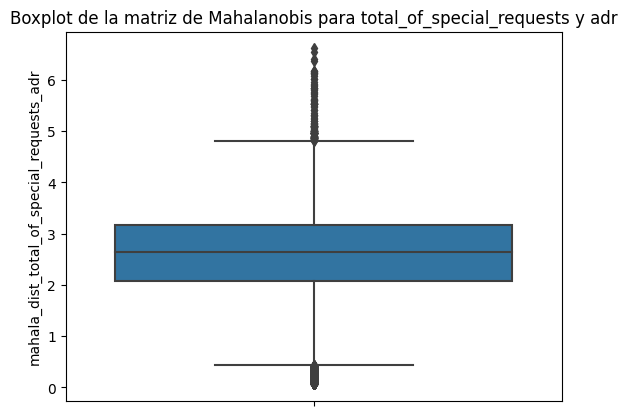

In [ ]:
boxplot_mahalanobis_entre('total_of_special_requests', 'adr')

Observamos con mayor atención a los casos mayores a 6.

In [ ]:
df_superiores = df_hotel_mahalanobis[df_hotel_mahalanobis['mahala_dist_total_of_special_requests_adr']>6]
df_superiores

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,mahala_dist_total_of_special_requests_adr
9710,Resort Hotel,24,2017,March,29,0,2,2,0,0,BB,BRA,Direct,TA/TO,True,0,4,D,D,0,No Deposit,250.0,not company,0,Group,63.00,0,5,False,6.609429
17904,City Hotel,120,2017,April,17,1,4,2,0,0,SC,DEU,Online TA,TA/TO,False,0,0,A,A,0,No Deposit,9.0,not company,0,Transient-Party,108.00,0,5,False,6.017795
19747,City Hotel,0,2016,October,29,1,1,2,0,0,BB,ESP,Online TA,TA/TO,True,0,0,A,A,1,No Deposit,9.0,not company,0,Transient,12.00,0,4,False,6.370019
23686,City Hotel,46,2016,November,18,2,3,2,0,0,BB,BRA,Online TA,TA/TO,False,0,0,A,A,0,No Deposit,7.0,not company,0,Transient,68.07,0,5,False,6.537626
29640,City Hotel,51,2017,June,9,2,3,2,0,0,BB,PRT,Direct,Direct,False,0,0,D,D,0,No Deposit,not agent,not company,0,Transient,78.00,0,5,True,6.400541
30715,City Hotel,207,2017,June,24,2,2,2,0,0,SC,USA,Online TA,TA/TO,False,0,0,A,A,0,No Deposit,9.0,not company,0,Transient,99.00,0,5,False,6.127338
44488,City Hotel,125,2016,September,4,4,6,2,0,0,BB,ISR,Online TA,TA/TO,False,0,0,A,A,0,No Deposit,7.0,not company,0,Transient,99.79,0,5,False,6.117533
46031,Resort Hotel,66,2015,November,19,1,3,2,0,0,BB,IRL,Online TA,TA/TO,False,0,0,A,D,1,No Deposit,240.0,not company,0,Transient,32.40,0,4,False,6.008971
48217,City Hotel,30,2015,October,14,0,3,2,0,0,BB,BEL,Online TA,TA/TO,False,0,0,A,A,0,No Deposit,9.0,not company,0,Contract,96.30,0,5,False,6.161117
56499,Resort Hotel,241,2015,December,4,2,2,1,0,0,BB,PRT,Direct,TA/TO,True,1,3,A,E,1,No Deposit,240.0,not company,0,Transient,29.00,0,4,False,6.068231


Vemos que de todos los datos, hay uno solo en donde is_canceled es true, los dejamos en el dataset.

#### **adults y adr**
Realizamos la matriz de Mahalanobis y mostramos su boxplot.

mahala_dist_adults_adr


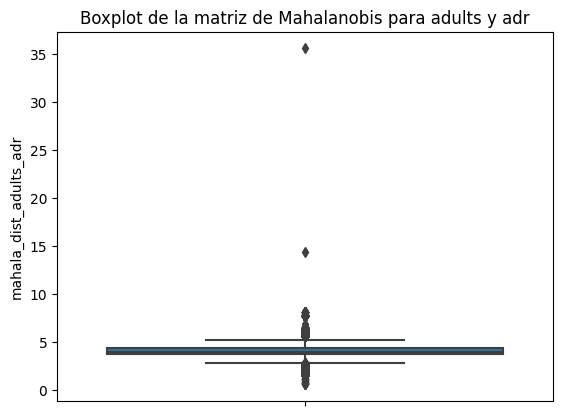

In [ ]:
boxplot_mahalanobis_entre('adults', 'adr')

Ahora veamos un dispersograma con un umbral para outliers con distancia de Mahalanobis mayor a 10.

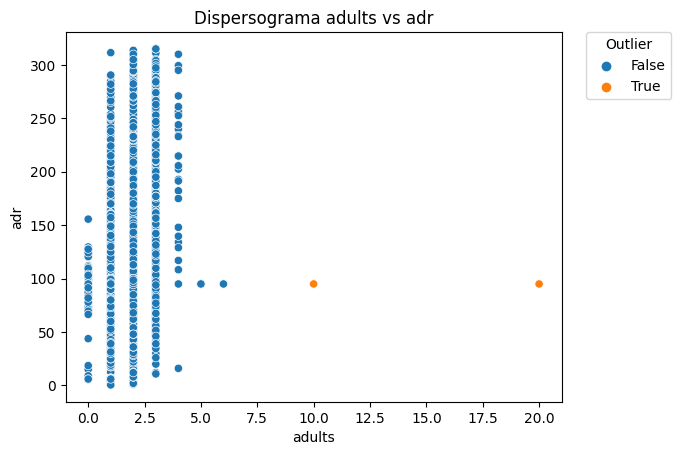

In [ ]:
es_outlier = (df_hotel_mahalanobis['mahala_dist_adults_adr'] > 10)
sns.scatterplot(x=df_hotel['adults'],y=df_hotel['adr'], hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma adults vs adr')
plt.show()

Observemos ese caso de outlier.

In [ ]:
df_superiores = df_hotel_mahalanobis[df_hotel_mahalanobis['mahala_dist_adults_adr']>10]
df_superiores

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,mahala_dist_total_of_special_requests_adr,mahala_dist_adults_adr
11745,Resort Hotel,334,2015,October,12,2,5,20,0,0,BB,PRT,Direct,Direct,False,0,0,D,D,0,No Deposit,not agent,not company,0,Group,95.0,0,0,True,2.639539,35.605225
35253,Resort Hotel,334,2015,October,12,2,5,10,0,0,BB,PRT,Direct,Direct,False,0,0,E,E,0,No Deposit,not agent,not company,0,Group,95.0,0,0,True,2.639539,14.325613


Vamos a eliminar el caso que se sale más de la media, y el otro lo dejaremos.

In [ ]:
eliminar(df_hotel_mahalanobis[df_hotel_mahalanobis['mahala_dist_adults_adr']>20])

#### **required_car_parking_spaces y total_of_special_requests**

Observemos un boxplot de la distancia de Mahalanobis entre las variables.

mahala_dist_required_car_parking_spaces_total_of_special_requests


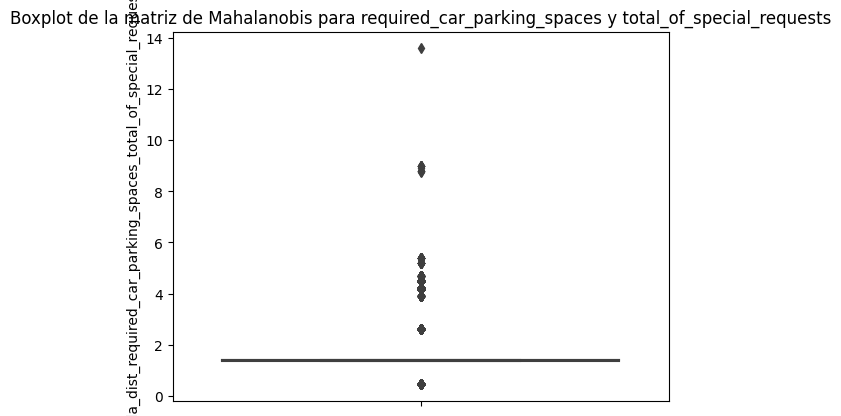

In [ ]:
boxplot_mahalanobis_entre('required_car_parking_spaces', 'total_of_special_requests')

Centremonos en los casos en donde la distancia sea mayor que 8, a través del siguente diagrama de dispersión.

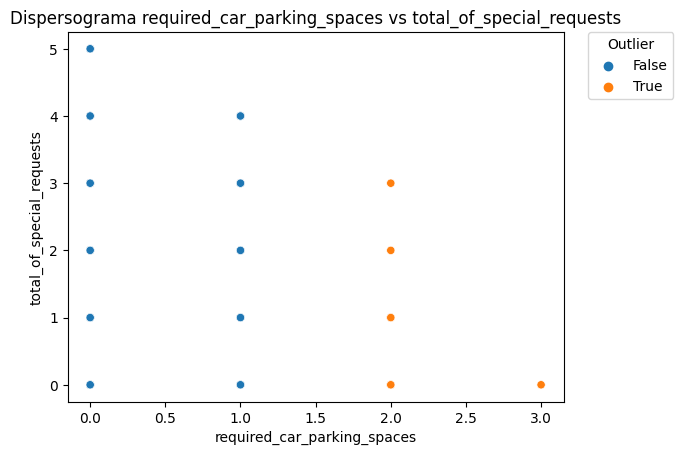

In [ ]:
es_outlier = (df_hotel_mahalanobis['mahala_dist_required_car_parking_spaces_total_of_special_requests'] > 8)
sns.scatterplot(x=df_hotel['required_car_parking_spaces'],y=df_hotel['total_of_special_requests'], hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma required_car_parking_spaces vs total_of_special_requests')
plt.show()

In [ ]:
df_superiores = df_hotel_mahalanobis[es_outlier]
df_superiores

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,mahala_dist_total_of_special_requests_adr,mahala_dist_adults_adr,mahala_dist_required_car_parking_spaces_total_of_special_requests
619,City Hotel,1,2017,July,13,0,1,3,0,1,BB,PRT,Direct,Direct,False,0,0,F,F,0,No Deposit,14.0,not company,0,Transient,283.00,2,1,False,1.717571,2.618207,8.788453
2155,Resort Hotel,223,2016,May,24,1,5,2,0,0,BB,GBR,Groups,Direct,False,0,0,A,A,4,No Deposit,not agent,223.0,0,Transient-Party,52.00,2,0,False,3.504891,4.399463,9.007988
9614,Resort Hotel,32,2016,August,30,0,1,3,1,0,BB,BEL,Online TA,TA/TO,False,0,0,H,H,0,No Deposit,240.0,not company,0,Transient,274.00,2,1,False,1.515403,2.452033,8.788453
10975,Resort Hotel,0,2017,January,29,1,0,2,2,0,BB,GBR,Direct,TA/TO,True,0,0,G,G,0,No Deposit,not agent,not company,0,Transient-Party,85.00,2,0,False,2.834951,4.003425,9.007988
11735,Resort Hotel,36,2016,March,10,2,5,2,0,0,BB,POL,Online TA,TA/TO,False,0,0,A,A,0,No Deposit,240.0,not company,0,Transient,59.14,2,2,False,3.764894,4.305623,8.757425
13615,Resort Hotel,205,2017,June,26,3,10,2,0,0,BB,PRT,Direct,Direct,False,0,0,A,A,2,No Deposit,250.0,not company,0,Transient,111.00,3,0,False,2.337888,3.769630,13.591974
14288,Resort Hotel,44,2015,July,5,2,0,3,0,0,HB,PRT,Online TA,TA/TO,False,0,0,G,G,3,No Deposit,240.0,not company,0,Transient,225.00,2,0,False,1.502160,1.707642,9.007988
21949,Resort Hotel,225,2016,May,26,2,3,2,0,0,BB,GBR,Groups,Direct,False,0,0,A,A,2,Refundable,not agent,223.0,0,Transient-Party,80.00,2,0,False,2.934236,4.056870,9.007988
38385,Resort Hotel,5,2017,February,28,1,5,2,0,0,BB,NLD,Groups,Corporate,False,0,0,A,A,1,No Deposit,not agent,223.0,0,Transient-Party,47.50,2,0,False,3.598431,4.460671,9.007988
42360,Resort Hotel,169,2016,March,31,1,3,2,0,0,BB,NLD,Groups,Direct,False,0,0,A,A,0,Refundable,not agent,223.0,0,Transient-Party,78.00,2,0,False,2.974211,4.078953,9.007988


Vemos que por más que son outliers, es importante dejarlos, ya que son relevantes para nuestro objetivo. En totos los casos is_canceled es false. Aún así vamos a observar caso más alejado, en donde la distancia es casi 14.

In [ ]:
df_superiores = df_hotel_mahalanobis[df_hotel_mahalanobis['mahala_dist_required_car_parking_spaces_total_of_special_requests']>13]
df_superiores

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,mahala_dist_total_of_special_requests_adr,mahala_dist_adults_adr,mahala_dist_required_car_parking_spaces_total_of_special_requests
13615,Resort Hotel,205,2017,June,26,3,10,2,0,0,BB,PRT,Direct,Direct,False,0,0,A,A,2,No Deposit,250.0,not company,0,Transient,111.0,3,0,False,2.337888,3.76963,13.591974


Como se trata de un caso que se aleja demasiado del comportamiento típico, decidimos eliminarlo.

In [ ]:
eliminar(df_hotel_mahalanobis[df_hotel_mahalanobis['mahala_dist_adults_adr']>20])

#### **children y adr**

Veamos la boxplot de la matriz de Mahalanobis.

mahala_dist_children_adr


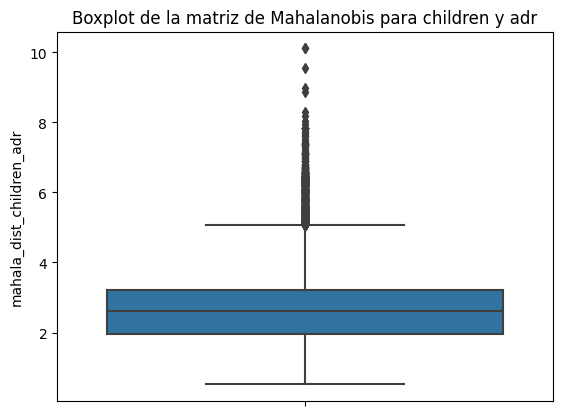

In [ ]:
boxplot_mahalanobis_entre('children', 'adr')

Veamos un dispersograma con umbral de 8 para la distancia de Mahalanobis.

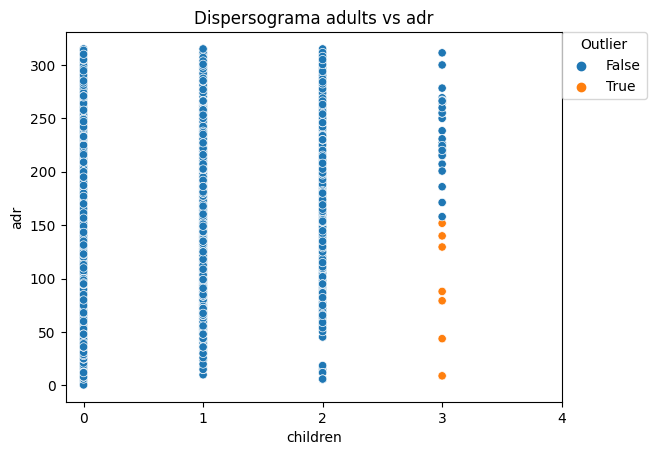

In [ ]:
es_outlier = (df_hotel_mahalanobis['mahala_dist_children_adr'] > 8)
sns.scatterplot(x=df_hotel['children'],y=df_hotel['adr'], hue=es_outlier)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma adults vs adr')
plt.xticks([i for i in range(0, 5, 1)])
plt.show()

Nos vamos a centrar en esos datos.

In [ ]:
df_superiores = df_hotel_mahalanobis[df_hotel_mahalanobis['mahala_dist_children_adr']>8]
df_superiores

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,mahala_dist_total_of_special_requests_adr,mahala_dist_adults_adr,mahala_dist_required_car_parking_spaces_total_of_special_requests,mahala_dist_children_adr
12356,City Hotel,159,2017,May,24,0,4,0,3,0,HB,FRA,Online TA,TA/TO,False,0,0,A,A,5,No Deposit,83.0,not company,0,Transient,129.60,0,0,False,2.011338,7.701286,1.391777,8.300271
23514,Resort Hotel,8,2016,November,25,0,2,2,3,0,BB,PRT,Direct,Direct,True,0,1,H,H,0,No Deposit,250.0,not company,0,Transient,88.00,0,0,False,2.775861,3.972597,1.391777,8.865789
28170,Resort Hotel,266,2016,June,28,2,8,2,3,0,BB,PRT,Online TA,TA/TO,False,0,0,H,H,0,No Deposit,240.0,not company,0,Transient,151.80,0,0,True,1.675719,3.576025,1.391777,8.031337
33185,City Hotel,0,2016,January,8,0,2,0,3,0,BB,PRT,Direct,Direct,False,0,0,B,B,1,No Deposit,not agent,not company,0,Transient-Party,9.00,0,1,False,4.443131,8.070681,0.453023,10.116377
50024,Resort Hotel,2,2016,May,15,2,3,2,3,0,BB,PRT,Corporate,Corporate,False,0,0,H,H,1,No Deposit,not agent,110.0,0,Transient,140.00,1,3,False,3.208165,3.608291,4.673155,8.171206
51964,City Hotel,197,2016,December,21,1,4,0,3,0,HB,FRA,Offline TA/TO,TA/TO,False,0,0,A,A,7,No Deposit,3.0,not company,0,Transient-Party,43.80,0,0,False,3.675644,7.866927,1.391777,9.540845
53049,City Hotel,227,2016,July,28,2,4,2,3,0,BB,FRA,Direct,Direct,False,0,0,B,B,2,No Deposit,14.0,not company,0,Transient,79.26,0,0,True,2.949010,4.064995,1.391777,8.993702
58255,City Hotel,59,2016,July,24,2,4,0,3,0,BB,PRT,Direct,Direct,False,0,0,B,B,0,No Deposit,not agent,not company,0,Transient,9.00,0,2,True,4.844092,8.070681,1.354969,10.116377


Al ser una cantidad muy pequeña de datos, decidimos eliminarlos.

In [ ]:
eliminar(df_superiores)

#### **stays_in_weekend_nights y stays_in_week_nights**

mahala_dist_stays_in_weekend_nights_stays_in_week_nights


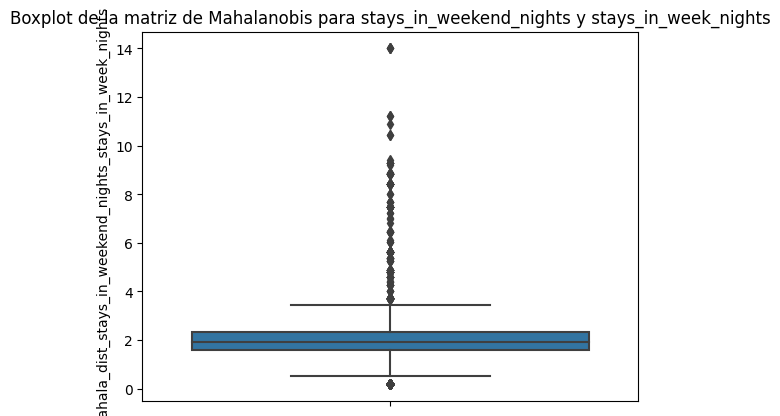

In [ ]:
boxplot_mahalanobis_entre('stays_in_weekend_nights', 'stays_in_week_nights')

También mostramos un diagrama de dispersión.

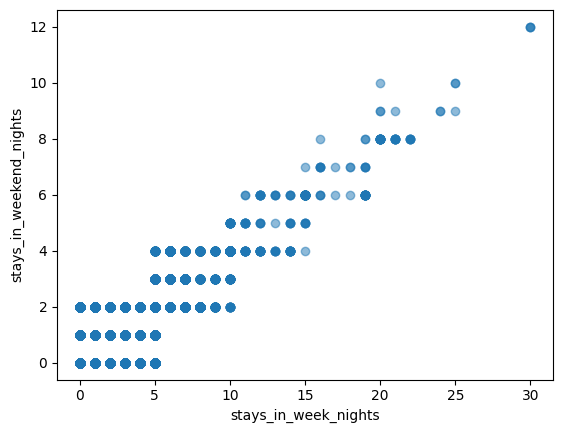

In [ ]:
plt.scatter(df_hotel['stays_in_week_nights'], df_hotel['stays_in_weekend_nights'], alpha = 0.5)
plt.xlabel('stays_in_week_nights')
plt.ylabel('stays_in_weekend_nights')
plt.show()

Observamos que existen casos en donde las personas van unicamente a pasar el día, (ambos valores son cero) sigue siendo un dato válido.

Tambien vemos que el diagrama de dispersión tiene un comportamiento válido, ya que es creciente, (a más días de fin de semana, también más días de semana).

In [ ]:
df_superiores = df_hotel_mahalanobis[df_hotel_mahalanobis['mahala_dist_stays_in_weekend_nights_stays_in_week_nights']>12]
df_superiores

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,mahala_dist_total_of_special_requests_adr,mahala_dist_adults_adr,mahala_dist_required_car_parking_spaces_total_of_special_requests,mahala_dist_children_adr,mahala_dist_stays_in_weekend_nights_stays_in_week_nights
43389,Resort Hotel,242,2017,February,17,12,30,2,0,0,BB,DEU,Offline TA/TO,TA/TO,False,0,0,D,D,0,No Deposit,75.0,not company,0,Transient,35.70,0,1,False,3.843008,4.628234,0.453023,3.885057,14.004355
54046,Resort Hotel,122,2016,January,12,12,30,2,0,0,BB,PRT,Offline TA/TO,TA/TO,False,0,0,A,A,0,No Deposit,8.0,not company,0,Transient,22.11,0,0,True,4.132934,4.832756,1.391777,4.203029,14.004355
57059,Resort Hotel,214,2016,January,26,12,30,2,0,0,BB,GBR,Offline TA/TO,TA/TO,False,0,0,D,D,0,No Deposit,8.0,not company,0,Transient,31.45,0,0,False,3.935128,4.690933,1.391777,3.984451,14.004355


Creemos conveniente eliminarlos, ya que se alejan del comportamiento común.

In [ ]:
eliminar(df_superiores)

#### **previous_cancellations y previous_bookings_not_canceled**

Veamos el boxplot con la distancia de Mahalanobis.

mahala_dist_previous_cancellations_previous_bookings_not_canceled


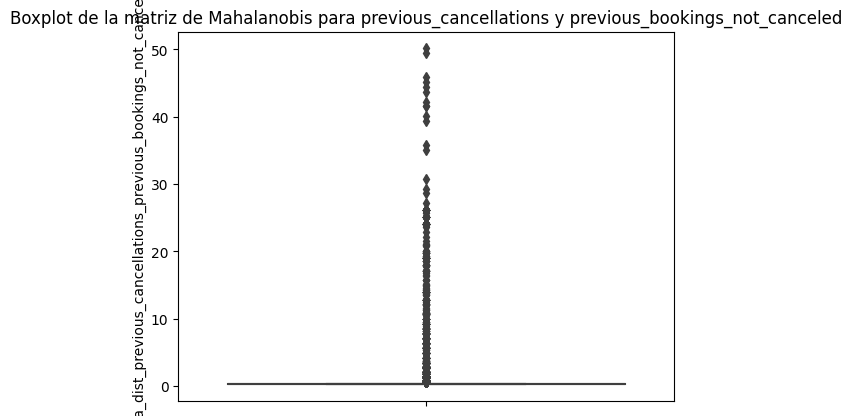

In [ ]:
boxplot_mahalanobis_entre('previous_cancellations', 'previous_bookings_not_canceled')

Hay muchos outliers, veamos los casos con un umbral de 40.

In [ ]:
df_superiores = df_hotel_mahalanobis[df_hotel_mahalanobis['mahala_dist_previous_cancellations_previous_bookings_not_canceled']>30]
df_superiores

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,mahala_dist_total_of_special_requests_adr,mahala_dist_adults_adr,mahala_dist_required_car_parking_spaces_total_of_special_requests,mahala_dist_children_adr,mahala_dist_stays_in_weekend_nights_stays_in_week_nights,mahala_dist_previous_cancellations_previous_bookings_not_canceled
8096,City Hotel,0,2017,January,2,1,2,1,0,0,BB,PRT,Corporate,Corporate,True,6,58,A,A,0,No Deposit,not agent,40.0,0,Transient,65.0,0,0,False,3.237236,5.885314,1.391777,3.201321,1.611130,41.534010
10075,City Hotel,4,2017,May,2,0,2,1,0,0,BB,PRT,Corporate,Corporate,True,6,62,A,A,1,No Deposit,not agent,40.0,0,Transient,65.0,0,1,False,3.184474,5.885314,0.453023,3.201321,2.032835,44.408321
19431,City Hotel,8,2016,December,28,0,2,1,0,0,BB,PRT,Corporate,Corporate,True,6,58,A,A,1,No Deposit,not agent,40.0,0,Transient,65.0,0,2,True,3.640660,5.885314,1.354969,3.201321,2.032835,41.534010
20140,City Hotel,4,2017,July,16,1,0,1,0,0,BB,PRT,Corporate,Corporate,True,6,70,A,A,0,No Deposit,not agent,40.0,0,Transient,65.0,0,1,False,3.184474,5.885314,0.453023,3.201321,2.721003,50.166087
23899,City Hotel,6,2016,December,8,0,1,1,0,0,BB,PRT,Corporate,Corporate,True,5,55,A,A,0,No Deposit,not agent,40.0,0,Transient,67.0,0,2,False,3.598381,5.872111,1.354969,3.154770,2.342006,39.378484
24471,City Hotel,1,2017,January,31,0,3,1,0,0,BB,PRT,Corporate,Corporate,True,6,61,A,A,0,No Deposit,not agent,40.0,0,Transient,65.0,0,1,False,3.184474,5.885314,0.453023,3.201321,1.876656,43.689415
26880,City Hotel,1,2016,September,6,0,3,1,0,0,BB,PRT,Corporate,Corporate,True,3,43,A,B,0,No Deposit,not agent,40.0,0,Transient,67.0,1,0,False,3.196440,5.872111,4.495435,3.154770,1.876656,30.777150
28188,City Hotel,7,2016,November,2,2,6,1,0,0,BB,PRT,Corporate,Corporate,True,5,50,A,A,0,No Deposit,40.0,not company,0,Transient-Party,65.0,0,0,False,3.237236,5.885314,1.391777,3.201321,0.535597,35.782092
28427,City Hotel,7,2016,December,14,0,2,1,0,0,BB,PRT,Corporate,Corporate,True,5,56,A,A,3,No Deposit,not agent,40.0,0,Transient,67.0,1,2,False,3.598381,5.872111,4.234703,3.154770,2.032835,40.098401
32200,City Hotel,5,2017,January,10,0,3,1,0,0,BB,PRT,Corporate,Corporate,True,6,59,A,A,0,No Deposit,not agent,40.0,0,Transient,65.0,0,2,False,3.640660,5.885314,1.354969,3.201321,1.876656,42.252248


Vemos que en todos los casos, excepto uno is_canceled es false, por lo que creemos conveniente no eliminarlos.

#### **lead_time y days_in_waiting_list**

Veamos los outliers entre lead_time y days_in_waiting_list

mahala_dist_lead_time_days_in_waiting_list


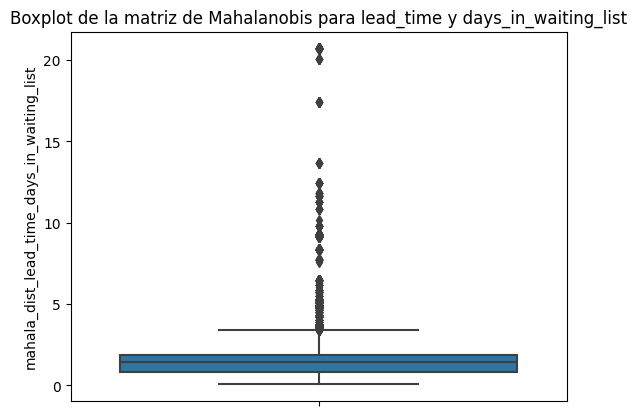

In [ ]:
boxplot_mahalanobis_entre('lead_time', 'days_in_waiting_list')

In [ ]:
df_superiores = df_hotel_mahalanobis[df_hotel_mahalanobis['mahala_dist_lead_time_days_in_waiting_list']>15]
print("Total de casos:",df_superiores.shape[0], "de los cuales son True: ",df_superiores[df_superiores['is_canceled'] == True].shape[0])

Total de casos: 45 de los cuales son True:  38


Ya que hay muchos casos en donde is_canceled es true, no vamos a hacer nada con estos.

#### **lead_time y adults**

Veamos los outliers entre lead_time y adults

mahala_dist_lead_time_adults


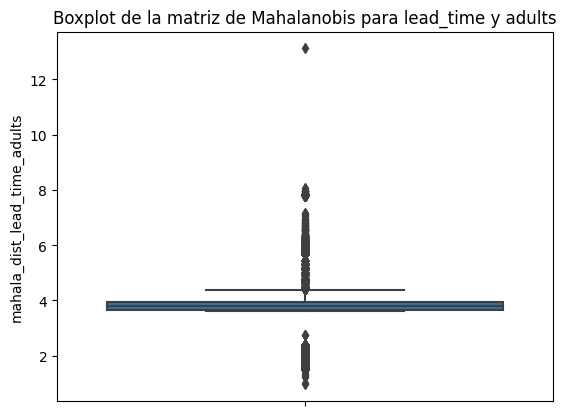

In [ ]:
boxplot_mahalanobis_entre('lead_time', 'adults')

Prestemos atención a los casos con superiores con un umbral del 8.

In [ ]:
df_superiores = df_hotel_mahalanobis[df_hotel_mahalanobis['mahala_dist_lead_time_adults']>8]
df_superiores

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,mahala_dist_total_of_special_requests_adr,mahala_dist_adults_adr,mahala_dist_required_car_parking_spaces_total_of_special_requests,mahala_dist_children_adr,mahala_dist_stays_in_weekend_nights_stays_in_week_nights,mahala_dist_previous_cancellations_previous_bookings_not_canceled,mahala_dist_lead_time_days_in_waiting_list,mahala_dist_lead_time_adults
1769,City Hotel,340,2017,July,9,2,2,0,2,0,BB,NOR,Online TA,TA/TO,False,0,0,B,B,0,No Deposit,9.0,not company,0,Transient,90.05,0,2,True,3.116537,7.716152,1.354969,6.324093,1.929020,0.265641,1.135182,8.030158
17665,City Hotel,351,2017,July,27,0,3,0,2,0,BB,CHE,Online TA,TA/TO,False,0,0,B,A,0,No Deposit,9.0,not company,0,Transient,90.05,0,1,False,2.621501,7.716152,0.453023,6.324093,1.876656,0.265641,1.232965,8.055220
35248,Resort Hotel,334,2015,October,12,2,5,10,0,0,BB,PRT,Direct,Direct,False,0,0,E,E,0,No Deposit,not agent,not company,0,Group,95.00,0,0,True,2.639539,14.325613,1.391777,2.505552,0.180103,0.265641,1.082074,13.126216


Únicamente son tres casos, por lo que decidimos eliminarlo.

In [ ]:
eliminar(df_superiores)

Ahora miremos los inferiores a 1.

In [ ]:
df_inferiores = df_hotel_mahalanobis[df_hotel_mahalanobis['mahala_dist_lead_time_adults']<1]
df_inferiores

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,mahala_dist_total_of_special_requests_adr,mahala_dist_adults_adr,mahala_dist_required_car_parking_spaces_total_of_special_requests,mahala_dist_children_adr,mahala_dist_stays_in_weekend_nights_stays_in_week_nights,mahala_dist_previous_cancellations_previous_bookings_not_canceled,mahala_dist_lead_time_days_in_waiting_list,mahala_dist_lead_time_adults
55119,Resort Hotel,318,2017,July,28,1,2,4,0,0,BB,PRT,Online TA,TA/TO,False,0,0,C,C,0,No Deposit,147.0,not company,0,Transient,139.68,0,0,True,1.849833,1.791821,1.391777,1.490492,1.61113,0.265641,0.941481,0.965009


Es un solo caso, por lo que vamos a sacarlo.

In [ ]:
eliminar(df_inferiores)

#### **lead_time y previous_cancellations**

Veamos los outliers entre lead_time y previous_cancellations

mahala_dist_lead_time_previous_cancellations


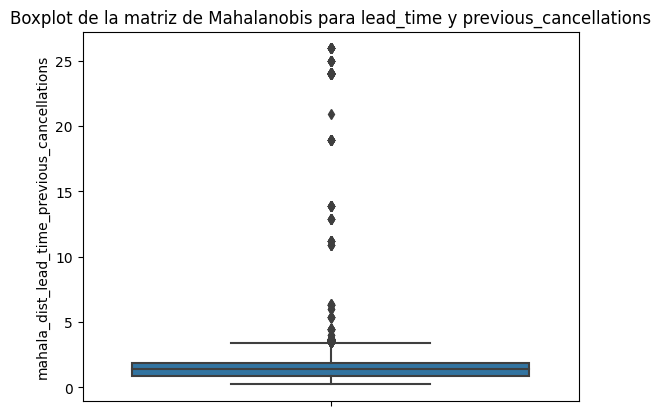

In [ ]:
boxplot_mahalanobis_entre('lead_time', 'previous_cancellations')

Veamos los casos superiores con un umbral de 10.

In [ ]:
df_superiores = df_hotel_mahalanobis[df_hotel_mahalanobis['mahala_dist_lead_time_previous_cancellations']>10]
print("Total de casos:",df_superiores.shape[0],"de los cuales is_canceled es true en:", df_superiores[df_superiores['is_canceled'] == True].shape[0])

Total de casos: 125 de los cuales is_canceled es true en: 116


Ya que en la gran mayoría de casos is_canceled es true, vamos a dejarlos.

#### **lead_time y previous_bookings_not_canceled**

Veamos los outliers entre lead_time y previous_bookings_not_canceled

mahala_dist_lead_time_previous_bookings_not_canceled


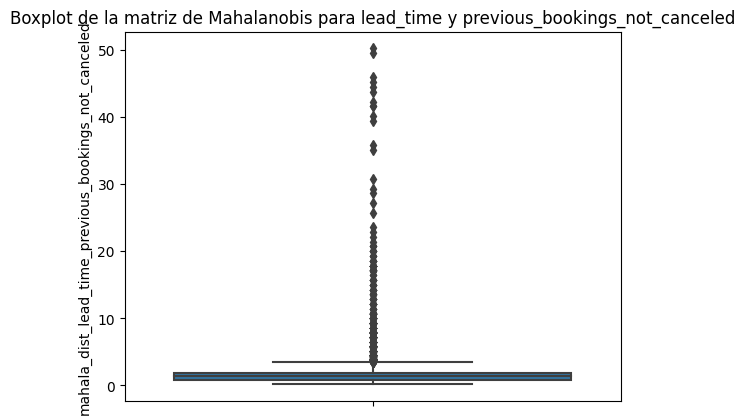

In [ ]:
boxplot_mahalanobis_entre('lead_time', 'previous_bookings_not_canceled')

Veamos los casos superiores con un umbral de 40.

In [ ]:
df_superiores = df_hotel_mahalanobis[df_hotel_mahalanobis['mahala_dist_lead_time_previous_bookings_not_canceled']>40]
df_superiores.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,mahala_dist_total_of_special_requests_adr,mahala_dist_adults_adr,mahala_dist_required_car_parking_spaces_total_of_special_requests,mahala_dist_children_adr,mahala_dist_stays_in_weekend_nights_stays_in_week_nights,mahala_dist_previous_cancellations_previous_bookings_not_canceled,mahala_dist_lead_time_days_in_waiting_list,mahala_dist_lead_time_adults,mahala_dist_lead_time_previous_cancellations,mahala_dist_lead_time_previous_bookings_not_canceled
8095,City Hotel,0,2017,January,2,1,2,1,0,0,BB,PRT,Corporate,Corporate,True,6,58,A,A,0,No Deposit,not agent,40.0,0,Transient,65.0,0,0,False,3.237236,5.885314,1.391777,3.201321,1.611130,41.534010,2.034332,5.859215,6.342676,41.537614
10074,City Hotel,4,2017,May,2,0,2,1,0,0,BB,PRT,Corporate,Corporate,True,6,62,A,A,1,No Deposit,not agent,40.0,0,Transient,65.0,0,1,False,3.184474,5.885314,0.453023,3.201321,2.032835,44.408321,1.998068,5.850796,6.327932,44.416749
19429,City Hotel,8,2016,December,28,0,2,1,0,0,BB,PRT,Corporate,Corporate,True,6,58,A,A,1,No Deposit,not agent,40.0,0,Transient,65.0,0,2,True,3.640660,5.885314,1.354969,3.201321,2.032835,41.534010,1.961818,5.842591,6.313362,41.538920
20138,City Hotel,4,2017,July,16,1,0,1,0,0,BB,PRT,Corporate,Corporate,True,6,70,A,A,0,No Deposit,not agent,40.0,0,Transient,65.0,0,1,False,3.184474,5.885314,0.453023,3.201321,2.721003,50.166087,1.998068,5.850796,6.327932,50.174817
24469,City Hotel,1,2017,January,31,0,3,1,0,0,BB,PRT,Corporate,Corporate,True,6,61,A,A,0,No Deposit,not agent,40.0,0,Transient,65.0,0,1,False,3.184474,5.885314,0.453023,3.201321,1.876656,43.689415,2.025264,5.857090,6.338974,43.696540


Vamos a eliminar estos casos, ya que están muy lejos de la media.

In [ ]:
eliminar(df_superiores)

#### **adr y previous_bookings_not_canceled**

Veamos los outliers entre lead_time y previous_bookings_not_canceled

mahala_dist_adr_previous_bookings_not_canceled


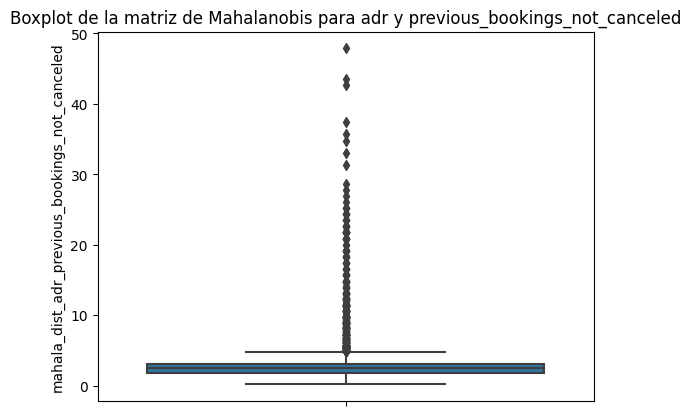

In [ ]:
boxplot_mahalanobis_entre('adr', 'previous_bookings_not_canceled')

Veamos los casos superiores con un umbral de 40.

In [ ]:
df_superiores = df_hotel_mahalanobis[df_hotel_mahalanobis['mahala_dist_adr_previous_bookings_not_canceled']>40]
df_superiores

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,mahala_dist_total_of_special_requests_adr,mahala_dist_adults_adr,mahala_dist_required_car_parking_spaces_total_of_special_requests,mahala_dist_children_adr,mahala_dist_stays_in_weekend_nights_stays_in_week_nights,mahala_dist_previous_cancellations_previous_bookings_not_canceled,mahala_dist_lead_time_days_in_waiting_list,mahala_dist_lead_time_adults,mahala_dist_lead_time_previous_cancellations,mahala_dist_lead_time_previous_bookings_not_canceled,mahala_dist_adr_previous_bookings_not_canceled
23893,City Hotel,6,2016,December,8,0,1,1,0,0,BB,PRT,Corporate,Corporate,True,5,55,A,A,0,No Deposit,not agent,40.0,0,Transient,67.0,0,2,False,3.598381,5.872111,1.354969,3.154770,2.342006,39.378484,1.979941,5.846667,5.372808,39.379960,47.885808
28181,City Hotel,7,2016,November,2,2,6,1,0,0,BB,PRT,Corporate,Corporate,True,5,50,A,A,0,No Deposit,40.0,not company,0,Transient-Party,65.0,0,0,False,3.237236,5.885314,1.391777,3.201321,0.535597,35.782092,1.970879,5.844622,5.368690,35.783051,43.519381
36760,City Hotel,4,2016,October,24,1,2,1,0,0,BB,PRT,Corporate,Corporate,True,5,49,A,A,0,No Deposit,not agent,40.0,0,Transient,65.0,0,2,False,3.640660,5.885314,1.354969,3.201321,1.611130,35.063545,1.998068,5.850796,5.381081,35.063504,42.646299


Vamos a eliminar estos casos, ya que son muy pocos.

In [ ]:
eliminar(df_superiores)

#### **adr y lead_time**

Veamos los outliers entre lead_time y previous_bookings_not_canceled

mahala_dist_adr_lead_time


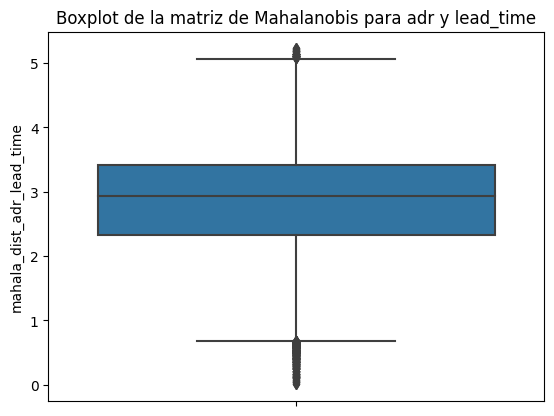

In [ ]:
boxplot_mahalanobis_entre('adr', 'lead_time')

Veamos los casos superiores con un umbral de 5.

In [ ]:
df_superiores = df_hotel_mahalanobis[df_hotel_mahalanobis['mahala_dist_adr_lead_time']>5]
print("Cantidad de casos con distancia de Mahalanobis superior a 5:",df_superiores.shape[0])

Cantidad de casos con distancia de Mahalanobis superior a 5: 87


Como son muchos casos, vamos a dejarlos.



In [ ]:
df_inferiores = df_hotel_mahalanobis[df_hotel_mahalanobis['mahala_dist_adr_lead_time']<0.5]
print("Cantidad de casos con distancia de Mahalanobis inferior a 0.5:",df_inferiores.shape[0])

Cantidad de casos con distancia de Mahalanobis inferior a 0.5: 198


Por el mismo motivo anterior, no haremos nada con estos datos.

#### **adr y stays_in_week_nights**

Veamos los outliers entre lead_time y previous_bookings_not_canceled

mahala_dist_adr_stays_in_week_nights


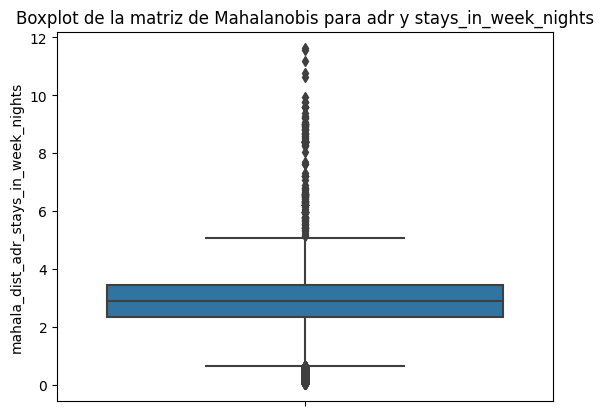

In [ ]:
boxplot_mahalanobis_entre('adr', 'stays_in_week_nights')

Veamos los casos superiores con un umbral de 10.

In [ ]:
df_superiores = df_hotel_mahalanobis[df_hotel_mahalanobis['mahala_dist_adr_stays_in_week_nights']>10]
df_superiores

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,mahala_dist_total_of_special_requests_adr,mahala_dist_adults_adr,mahala_dist_required_car_parking_spaces_total_of_special_requests,mahala_dist_children_adr,mahala_dist_stays_in_weekend_nights_stays_in_week_nights,mahala_dist_previous_cancellations_previous_bookings_not_canceled,mahala_dist_lead_time_days_in_waiting_list,mahala_dist_lead_time_adults,mahala_dist_lead_time_previous_cancellations,mahala_dist_lead_time_previous_bookings_not_canceled,mahala_dist_adr_previous_bookings_not_canceled,mahala_dist_adr_lead_time,mahala_dist_adr_stays_in_week_nights
9162,Resort Hotel,13,2016,April,25,9,24,2,0,0,BB,PRT,Corporate,Corporate,False,0,0,D,D,0,No Deposit,not agent,110.0,0,Transient,77.00,0,0,True,2.994251,4.090141,1.391777,2.922320,10.457907,0.265641,1.916525,3.906532,1.916778,1.937623,2.897016,3.668239,10.769971
14131,City Hotel,25,2015,November,30,9,24,2,0,0,BB,PRT,Direct,Direct,False,0,0,A,A,1,No Deposit,not agent,not company,0,Transient,98.33,0,0,True,2.575531,3.873900,1.391777,2.428751,10.457907,0.265641,1.807925,3.865873,1.808766,1.829418,2.425988,3.199886,10.623891
30187,Resort Hotel,88,2017,January,24,10,25,2,0,0,BB,GBR,Direct,Direct,False,0,0,D,D,0,No Deposit,not agent,not company,0,Transient,41.47,0,1,False,3.713322,4.545063,0.453023,3.750191,11.212821,0.265641,1.241494,3.698174,1.244114,1.262453,3.682223,4.031972,11.561792
47284,City Hotel,3,2016,November,14,9,25,2,0,0,BB,PRT,Corporate,Corporate,False,0,0,A,A,3,No Deposit,not agent,368.0,0,Transient,93.00,0,0,False,2.678253,3.923354,1.391777,2.551731,10.906728,0.265641,2.007133,3.942402,2.006856,2.027827,2.543653,3.430771,11.180931
60072,Resort Hotel,192,2017,January,14,10,25,2,0,0,BB,GBR,Offline TA/TO,TA/TO,False,0,0,A,D,0,No Deposit,6.0,not company,0,Transient,34.00,0,0,False,3.881345,4.653171,1.391777,3.924809,11.212821,0.265641,0.382523,3.608096,0.362277,0.349996,3.847369,3.901413,11.625262


Son pocos casos, los eliminaremos a continuación.


In [ ]:
eliminar(df_superiores)

In [ ]:
df_inferiores = df_hotel_mahalanobis[df_hotel_mahalanobis['mahala_dist_adr_stays_in_week_nights']<1]
print("Cantidad de casos con distancia de Mahalanobis inferior a 1:",df_inferiores.shape[0])

Cantidad de casos con distancia de Mahalanobis inferior a 1: 1528


Como son muchos datos, los dejaremos.


#### **adults y children con Isolation Forest**



Ahora veamos el análisis de adults y children pero utilizando Isolation Forest.

In [ ]:
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.05, random_state=42)
model.fit(df_hotel[['children', 'adults']])
anomaly_scores = model.decision_function(df_hotel[['children', 'adults']])
anomaly_labels = model.predict(df_hotel[['children', 'adults']])
df_hotel_mahalanobis['scores']=anomaly_scores
df_hotel_mahalanobis['outlier_label']=anomaly_labels
print("Outliers encontrados:",df_hotel_mahalanobis[df_hotel_mahalanobis.outlier_label==-1].shape[0])

Outliers encontrados: 2362


Ahora miremos el diagrama de dispersión.

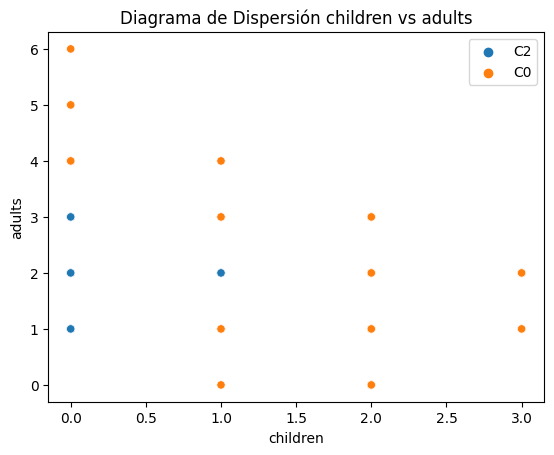

In [ ]:
color=[f"C{n+1}" for n in (df_hotel_mahalanobis['outlier_label'].values)]
sns.scatterplot(data=df_hotel_mahalanobis, x="children", y="adults", hue=color)
plt.title('Diagrama de Dispersión children vs adults')
plt.show()

Vemos que los casos, por más que sean outliers son posibles y no se alejan tanto de la media, por lo que decidimos dejarlos.

#### **adr y children con Isolation Forest**

Veamos los outliers con isolation forest.

In [ ]:
df_hotel_isolation = df_hotel.copy()
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.05, random_state=42)
model.fit(df_hotel[['children', 'adr']])
anomaly_scores = model.decision_function(df_hotel[['children', 'adr']])
anomaly_labels = model.predict(df_hotel[['children', 'adr']])
df_hotel_isolation['scores_AdrChildren']=anomaly_scores
df_hotel_isolation['outlier_label_scores_AdrChildren']=anomaly_labels
print("Outliers encontrados:",df_hotel_mahalanobis[df_hotel_mahalanobis.outlier_label==-1].shape[0])

Outliers encontrados: 2362


Ahora hacemos un diagrama de dispersión para mejor visualización de datos.

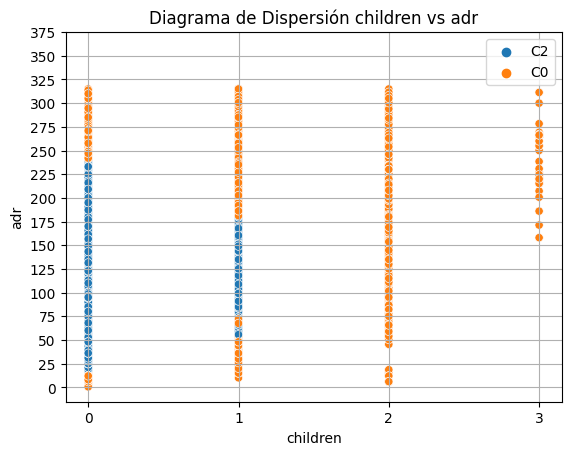

In [ ]:
color = [f"C{n+1}" for n in df_hotel_isolation['outlier_label_scores_AdrChildren'].values]
sns.scatterplot(data=df_hotel_isolation, x="children", y="adr", hue=color)
plt.title('Diagrama de Dispersión children vs adr')
plt.grid(True)
plt.yticks(range(0, 400, 25))
plt.xticks(range(int(df_hotel_isolation['children'].min()), int(df_hotel_isolation['children'].max())+1, 1))
plt.show()

Vamos a filtrar a los outliers en donde adr es menor o igual a 25 y children es 2.

In [ ]:
df_hotel_isolation[(df_hotel_isolation.adr <=25)& (df_hotel_isolation.children ==2)]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,scores_AdrChildren,outlier_label_scores_AdrChildren
4106,City Hotel,183,2017,July,7,1,2,2,2,0,BB,DEU,Online TA,TA/TO,False,0,0,F,F,1,No Deposit,9.0,not company,0,Transient,18.0,0,0,False,-0.098948,-1
9906,City Hotel,0,2017,February,4,0,1,0,2,0,BB,PRT,Direct,Direct,False,0,0,A,A,1,No Deposit,not agent,not company,0,Transient-Party,6.0,0,0,False,-0.107622,-1
9970,City Hotel,1,2015,December,23,0,3,0,2,0,BB,DEU,Online TA,TA/TO,False,0,0,B,B,0,No Deposit,9.0,not company,0,Transient-Party,6.0,0,0,False,-0.107622,-1
10895,City Hotel,30,2016,January,3,1,0,0,2,0,BB,PRT,Online TA,TA/TO,False,0,0,B,B,2,No Deposit,9.0,not company,0,Transient-Party,15.0,0,1,False,-0.101533,-1
13999,City Hotel,237,2016,July,24,1,0,0,2,0,BB,BEL,Direct,Direct,False,0,0,B,B,0,No Deposit,14.0,not company,0,Transient-Party,6.0,0,1,False,-0.107622,-1
14854,City Hotel,45,2016,June,17,2,2,0,2,0,BB,PRT,Direct,Direct,False,0,0,B,B,0,No Deposit,not agent,not company,0,Transient-Party,6.0,0,1,True,-0.107622,-1
19982,City Hotel,0,2016,October,27,0,3,0,2,0,HB,FRA,Online TA,TA/TO,False,0,0,F,B,3,No Deposit,9.0,not company,0,Transient,18.6,0,2,False,-0.098948,-1
21315,City Hotel,0,2016,April,8,0,1,0,2,0,BB,FRA,Online TA,TA/TO,False,0,0,F,B,0,No Deposit,9.0,not company,0,Transient-Party,6.0,1,0,False,-0.107622,-1
30190,City Hotel,150,2016,March,24,1,3,0,2,0,BB,PRT,Online TA,TA/TO,False,1,0,B,B,0,No Deposit,8.0,not company,0,Transient-Party,6.0,0,1,True,-0.107622,-1
30211,City Hotel,0,2017,January,21,0,1,0,2,0,BB,PRT,Direct,Direct,True,0,1,A,A,1,No Deposit,not agent,not company,0,Transient,6.0,0,1,False,-0.107622,-1


Es un grupo que se aparta del comportamiento común, pero los dejaremos ya que is_canceled en casi todos los casos es false, por lo que es importante para nuestro objetivo.

##adr y lead_time

Veamos el análisis con isolation forest de adr y lead_time

In [ ]:
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.05, random_state=42)
model.fit(df_hotel[['lead_time', 'adr']])
anomaly_scores = model.decision_function(df_hotel[['lead_time', 'adr']])
anomaly_labels = model.predict(df_hotel[['lead_time', 'adr']])
df_hotel_isolation['scores_AdrLeed_time']=anomaly_scores
df_hotel_isolation['outlier_label_scores_AdrLeed_time']=anomaly_labels
print("Outliers encontrados:",df_hotel_mahalanobis[df_hotel_mahalanobis.outlier_label==-1].shape[0])

Outliers encontrados: 2362


Ahora veamos el diagrama de dispersión-

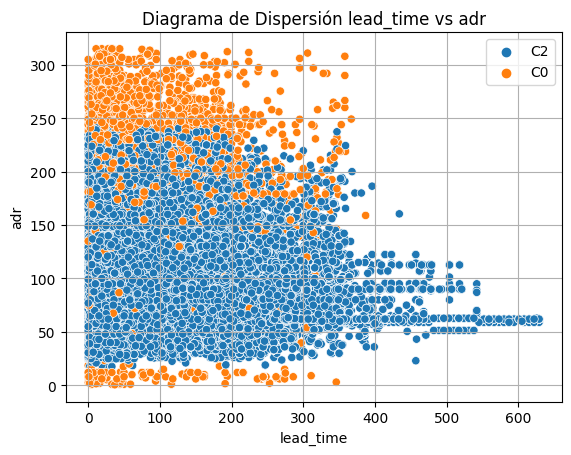

In [ ]:
color = [f"C{n+1}" for n in df_hotel_isolation['outlier_label_scores_AdrChildren'].values]
sns.scatterplot(data=df_hotel_isolation, x="lead_time", y="adr", hue=color)
plt.title('Diagrama de Dispersión lead_time vs adr')
plt.grid(True)
plt.show()

Hay un gran cantidad de outliers, pero a nuestro parecer, son casos posibles que no se alejan mucho del comportamineto común, por lo que dejaremos los datos.